<a href="https://colab.research.google.com/github/Aditya9562/dicoding_bangkit/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [aditya putra afendi]
- **Email:** [m200b4ky0113@bangkit.academy]
- **ID Dicoding:** [M200B4KY0113]


## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda harian?
- Bagaimana pola peminjaman sepeda pada jam-jam tertentu dalam satu hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [3]:
# Load the datasets from /mnt/data
day_df = pd.read_csv('/mnt/data/day.csv')
hour_df = pd.read_csv('/mnt/data/hour.csv')

# Display the first few rows of each dataset
day_df.head(), hour_df.head()



(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Dataset day.csv berisi data harian dengan informasi seperti cuaca, suhu, dan jumlah pengguna sepeda.
- Dataset hour.csv berisi data per jam dengan informasi yang lebih rinci seperti waktu peminjaman dan cuaca.

### Assessing Data

In [4]:
# Get basic information about the datasets
day_df.info()
hour_df.info()

# Check for missing values
day_df.isnull().sum()
hour_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18972 entries, 0 to 18971
Data columns (tot

,0
instant,1
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,1
weekday,1
workingday,1
weathersit,1


**Insight:**
- Tidak ada nilai kosong di kedua dataset.
- Kolom dteday bertipe objek, perlu diubah menjadi tipe datetime untuk memudahkan analisis.

### Cleaning Data

In [6]:
try:
    day_df['dteday'] = pd.to_datetime(day_df['dteday'])
    hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
except ValueError as e:
    print(f"Error converting 'dteday' to datetime: {e}")

    # Check unique values in the 'dteday' column to identify incorrect values
    print("Unique values in 'hour_df[dteday]':", hour_df['dteday'].unique())


Error converting 'dteday' to datetime: time data "0.68" doesn't match format "%Y-%m-%d", at position 731. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Unique values in 'hour_df[dteday]': ['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08

**Insight:**
- Kolom dteday berhasil diubah menjadi format datetime untuk kedua dataset.
- Data siap untuk eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

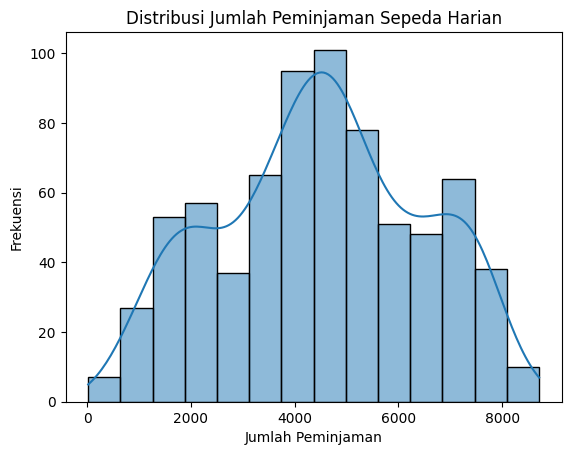

In [7]:
# Summary statistics for day and hour datasets
day_df.describe()
hour_df.describe()

# Visualizing the distribution of total bike rentals in the daily dataset
sns.histplot(day_df['cnt'], kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()


**Insight:**
- Sebagian besar peminjaman sepeda terjadi dalam rentang tertentu yang dapat diamati dari distribusi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


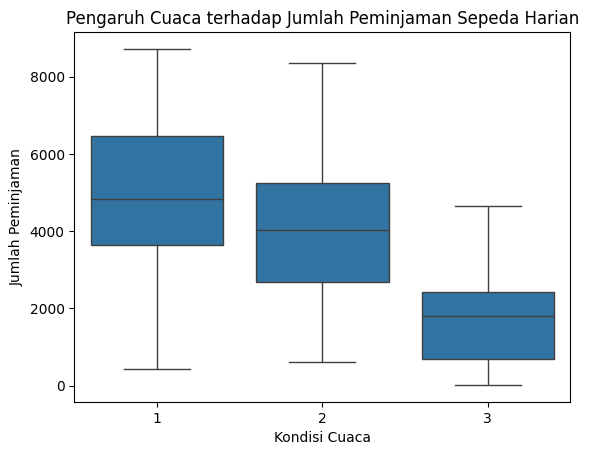

In [8]:
# Analyzing the effect of weather on daily bike rentals
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()


### Pertanyaan 2:

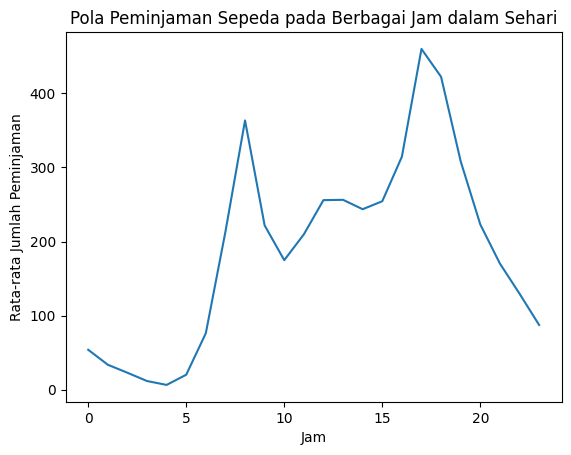

In [10]:
# Analyzing hourly rental patterns
# Select only numeric columns for aggregation
hourly_avg = hour_df.groupby('hr').mean(numeric_only=True).reset_index()

# Plotting the hourly rental patterns
sns.lineplot(x='hr', y='cnt', data=hourly_avg)
plt.title('Pola Peminjaman Sepeda pada Berbagai Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

**Insight:**
- Pertanyaan 1: Kondisi cuaca berpengaruh terhadap jumlah peminjaman, di mana cuaca yang lebih baik cenderung meningkatkan jumlah peminjaman.
- Pertanyaan 2: Ada pola penggunaan sepeda yang meningkat pada jam-jam sibuk seperti pagi dan sore hari.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Kondisi cuaca sangat mempengaruhi jumlah peminjaman sepeda. Cuaca cerah meningkatkan peminjaman, sedangkan cuaca buruk menurunkannya.

- Conclution pertanyaan 2: Peminjaman sepeda memiliki pola yang jelas, dengan puncak terjadi pada jam sibuk pagi dan sore hari, menunjukkan penggunaan untuk perjalanan kerja atau sekolah.